In [22]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from qualtrics import load_data

In [2]:
df = pd.read_csv('./data/Consistency LLMs Survey_July 16, 2025_16.21.csv')
df.head()

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,QID2747,QID2748,QID2749,QID2750,QID2751,QID2753,QID2754,QID2755,QID2756,QID2757
0,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,Conversation so far:\nTherapist: How can I he...,Conversation so far:\nTherapist: How can I he...,Conversation so far:\nTherapist: How can I he...,Conversation so far:\nTherapist: How can I he...,Conversation so far:\nTherapist: How can I he...,Conversation so far:\nTherapist: I'm glad you...,Conversation so far:\nTherapist: I'm glad you...,Conversation so far:\nTherapist: I'm glad you...,Conversation so far:\nTherapist: I'm glad you...,Conversation so far:\nTherapist: I'm glad you...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""distributionChannel""}","{""ImportId"":""userLanguage""}",...,"{""ImportId"":""QID2747""}","{""ImportId"":""QID2748""}","{""ImportId"":""QID2749""}","{""ImportId"":""QID2750""}","{""ImportId"":""QID2751""}","{""ImportId"":""QID2753""}","{""ImportId"":""QID2754""}","{""ImportId"":""QID2755""}","{""ImportId"":""QID2756""}","{""ImportId"":""QID2757""}"
2,2025-07-11 16:25:10,2025-07-11 16:46:29,0,100,1279,1,2025-07-11 16:46:30,R_1iGl89Q8MxXlIsN,anonymous,EN,...,6,4,2,1,1,5,5,5,3,3
3,2025-07-11 22:15:12,2025-07-11 22:52:14,0,100,2222,1,2025-07-11 22:52:15,R_6NX9X5fS69edVqn,anonymous,EN,...,6,6,6,6,6,6,6,6,6,6
4,2025-07-11 22:52:30,2025-07-11 23:27:06,0,100,2075,1,2025-07-11 23:27:07,R_5SLk6sYPjkUIm9H,anonymous,EN,...,5,5,5,5,5,5,5,5,5,5


In [3]:
df.keys()

Index(['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)',
       'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel',
       'UserLanguage', 'Q_BallotBoxStuffing', 'Q472', 'Q474_1', 'Q474_2',
       'Q474_3', 'Q474_4', 'Q474_5', 'Q474_6', 'Q474_7', 'Q474_8', 'Q474_9',
       'Q474_10', 'Q474_11', 'QID2669', 'QID2670', 'QID2671', 'QID2672',
       'QID2673', 'QID2675', 'QID2676', 'QID2677', 'QID2678', 'QID2679',
       'QID2681', 'QID2682', 'QID2683', 'QID2684', 'QID2685', 'QID2687',
       'QID2688', 'QID2689', 'QID2690', 'QID2691', 'QID2693', 'QID2694',
       'QID2695', 'QID2696', 'QID2697', 'QID2699', 'QID2700', 'QID2701',
       'QID2702', 'QID2703', 'QID2705', 'QID2706', 'QID2707', 'QID2708',
       'QID2709', 'QID2711', 'QID2712', 'QID2713', 'QID2714', 'QID2715',
       'QID2717', 'QID2718', 'QID2719', 'QID2720', 'QID2721', 'QID2723',
       'QID2724', 'QID2725', 'QID2726', 'QID2727', 'QID2729', 'QID2730',
       'QID2731', 'QID2732', 'QID2733', 'Q

In [7]:
df['Q474_1']

0    When you think about consistency in a conversa...
1                              {"ImportId":"QID474_1"}
2                                                    4
3                                                    4
4                                                    5
Name: Q474_1, dtype: object

In [11]:
# Select columns Q474_1 to Q474_11 and convert to numeric
q474_cols = [f'Q474_{i}' for i in range(1, 12)]
q474_numeric = df[q474_cols].apply(pd.to_numeric, errors='coerce')

# Calculate mean and standard deviation for each column
means = q474_numeric.mean()
stds = q474_numeric.std()

print("Means:\n", means)
print("\nStandard Deviations:\n", stds)

Means:
 Q474_1     4.333333
Q474_2     4.333333
Q474_3     4.333333
Q474_4     4.333333
Q474_5     4.666667
Q474_6     4.333333
Q474_7     4.333333
Q474_8     2.000000
Q474_9     3.666667
Q474_10    4.000000
Q474_11    1.000000
dtype: float64

Standard Deviations:
 Q474_1     0.577350
Q474_2     1.154701
Q474_3     1.154701
Q474_4     0.577350
Q474_5     0.577350
Q474_6     1.154701
Q474_7     0.577350
Q474_8     1.000000
Q474_9     1.154701
Q474_10    1.000000
Q474_11    0.000000
dtype: float64


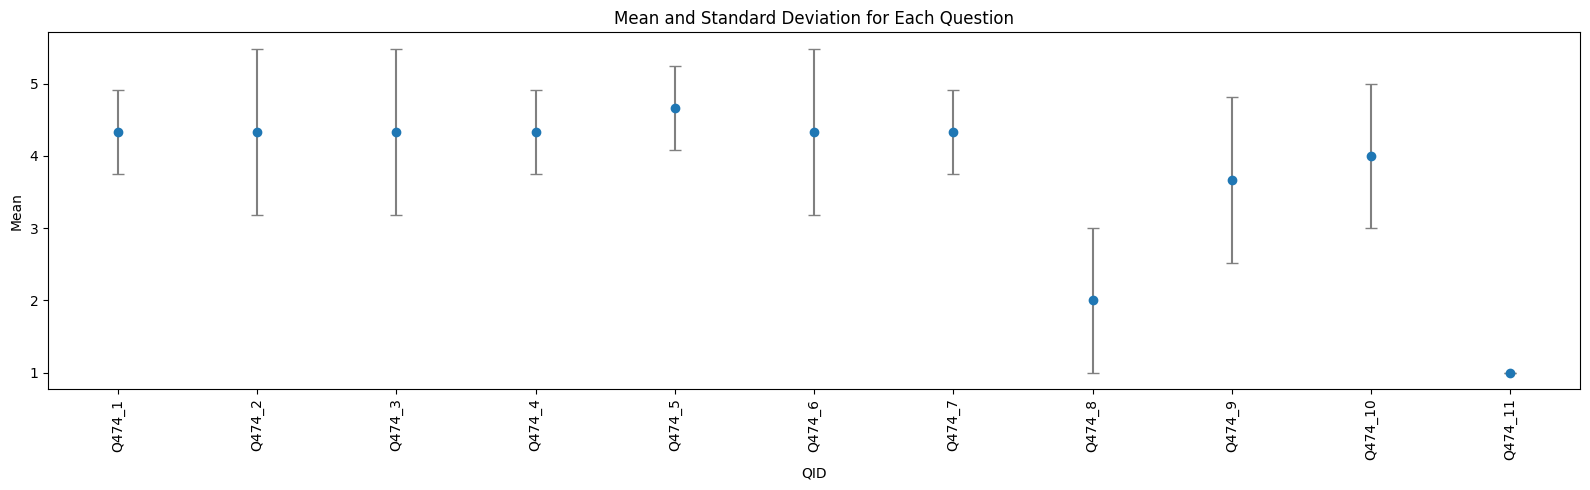

In [35]:
plt.figure(figsize=(16, 5))
plt.errorbar(means.index, means.values, yerr=stds.values, fmt='o', ecolor='gray', capsize=4)
plt.xticks(rotation=90)
plt.xlabel('QID')
plt.ylabel('Mean')
plt.title('Mean and Standard Deviation for Each Question')
plt.tight_layout()
plt.show()

In [12]:
question_list = ['QID2669', 'QID2670', 'QID2671', 'QID2672',
       'QID2673', 'QID2675', 'QID2676', 'QID2677', 'QID2678', 'QID2679',
       'QID2681', 'QID2682', 'QID2683', 'QID2684', 'QID2685', 'QID2687',
       'QID2688', 'QID2689', 'QID2690', 'QID2691', 'QID2693', 'QID2694',
       'QID2695', 'QID2696', 'QID2697', 'QID2699', 'QID2700', 'QID2701',
       'QID2702', 'QID2703', 'QID2705', 'QID2706', 'QID2707', 'QID2708',
       'QID2709', 'QID2711', 'QID2712', 'QID2713', 'QID2714', 'QID2715',
       'QID2717', 'QID2718', 'QID2719', 'QID2720', 'QID2721', 'QID2723',
       'QID2724', 'QID2725', 'QID2726', 'QID2727', 'QID2729', 'QID2730',
       'QID2731', 'QID2732', 'QID2733', 'QID2735', 'QID2736', 'QID2737',
       'QID2738', 'QID2739', 'QID2741', 'QID2742', 'QID2743', 'QID2744',
       'QID2745', 'QID2747', 'QID2748', 'QID2749', 'QID2750', 'QID2751',
       'QID2753', 'QID2754', 'QID2755', 'QID2756', 'QID2757']

In [13]:
# Convert question_list columns to numeric, skipping non-numeric rows
question_numeric = df[question_list].apply(pd.to_numeric, errors='coerce')

# Calculate mean and standard deviation for each column
question_means = question_numeric.mean()
question_stds = question_numeric.std()

print("Means:\n", question_means)
print("\nStandard Deviations:\n", question_stds)

Means:
 QID2669    5.666667
QID2670    5.666667
QID2671    5.333333
QID2672    5.666667
QID2673    5.333333
             ...   
QID2753    5.333333
QID2754    5.333333
QID2755    5.333333
QID2756    4.666667
QID2757    4.666667
Length: 75, dtype: float64

Standard Deviations:
 QID2669    0.577350
QID2670    0.577350
QID2671    0.577350
QID2672    0.577350
QID2673    0.577350
             ...   
QID2753    0.577350
QID2754    0.577350
QID2755    0.577350
QID2756    1.527525
QID2757    1.527525
Length: 75, dtype: float64


In [18]:
means_normalized = question_means / 6
stds_normalized = question_stds / 6

print("Normalized Means:\n", means_normalized)
print("\nNormalized Standard Deviations:\n", stds_normalized)

Normalized Means:
 QID2669    0.944444
QID2670    0.944444
QID2671    0.888889
QID2672    0.944444
QID2673    0.888889
             ...   
QID2753    0.888889
QID2754    0.888889
QID2755    0.888889
QID2756    0.777778
QID2757    0.777778
Length: 75, dtype: float64

Normalized Standard Deviations:
 QID2669    0.096225
QID2670    0.096225
QID2671    0.096225
QID2672    0.096225
QID2673    0.096225
             ...   
QID2753    0.096225
QID2754    0.096225
QID2755    0.096225
QID2756    0.254588
QID2757    0.254588
Length: 75, dtype: float64


In [ ]:
# round scores to 0 and 1 for correlations, also look at inter-rater consistency
# finer grained average particular lines

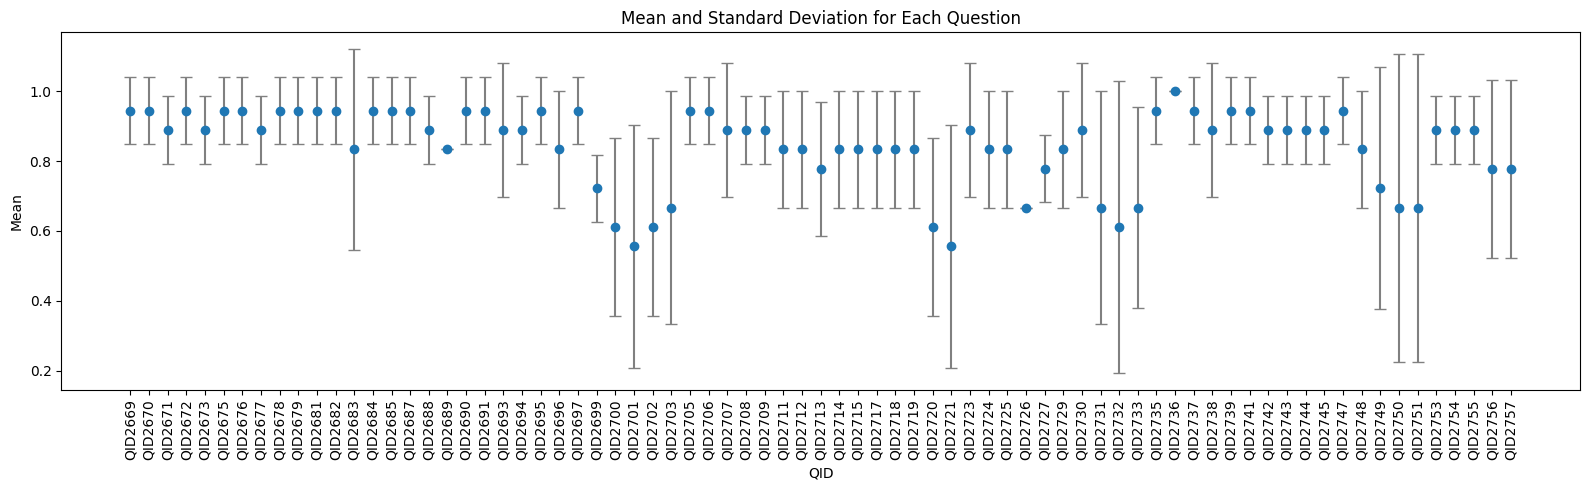

In [ ]:
plt.figure(figsize=(16, 5))
plt.errorbar(means_normalized.index, means_normalized.values, yerr=stds_normalized.values, fmt='o', ecolor='gray', capsize=4)
plt.xticks(rotation=90)
plt.xlabel('QID')
plt.ylabel('Mean')
plt.title('Mean and Standard Deviation for Each Question')
plt.tight_layout()
plt.show()

In [36]:
# Group means_normalized and stds_normalized in sets of 5
group_size = 5
num_groups = int(np.ceil(len(means_normalized) / group_size))

grouped_means = []
grouped_stds = []

for i in range(num_groups):
    start = i * group_size
    end = start + group_size
    group_mean = means_normalized.iloc[start:end].mean()
    # Propagate error: std of the mean = sqrt(sum(std_i^2))/n
    group_std = np.sqrt((stds_normalized.iloc[start:end] ** 2).sum()) / (end - start)
    grouped_means.append(group_mean)
    grouped_stds.append(group_std)

print("Grouped Means:", grouped_means)
print("Grouped Standard Deviations:", grouped_stds)

Grouped Means: [0.9222222222222222, 0.9333333333333333, 0.9222222222222223, 0.9111111111111112, 0.9, 0.6333333333333333, 0.9111111111111111, 0.8222222222222223, 0.7333333333333334, 0.8, 0.7333333333333333, 0.9444444444444444, 0.9, 0.7666666666666666, 0.8444444444444444]
Grouped Standard Deviations: [0.04303314829119352, 0.04303314829119352, 0.06938886664887109, 0.03849001794597506, 0.06085806194501846, 0.12171612389003691, 0.054433105395181744, 0.0769800358919501, 0.10363754503432017, 0.06382847385042253, 0.1319371343004213, 0.05091750772173157, 0.04303314829119352, 0.14782371884055634, 0.07934920476158722]


In [39]:
models = ['chatting_gemma', 'chatting_mistral', 'chatting_llama', 'chatting_llama_ppo', 'chatting_llama_sft_ppo',
          'education_gemma', 'education_mistral', 'education_llama', 'education_llama_ppo', 'education_llama_sft_ppo',
          'therapy_gemma', 'therapy_mistral', 'therapy_llama', 'therapy_llama_ppo', 'therapy_llama_sft_ppo']

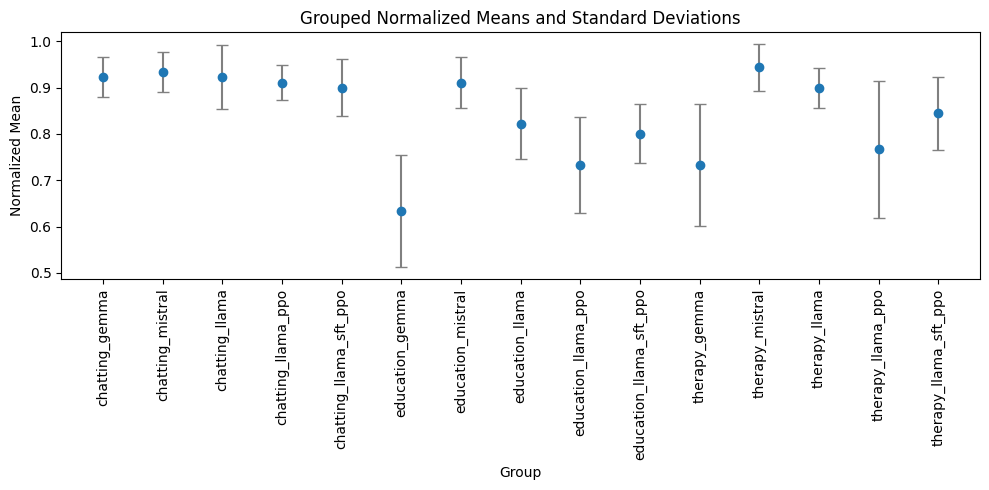

In [43]:
plt.figure(figsize=(10, 5))
x = np.arange(len(grouped_means))
plt.errorbar(x, grouped_means, yerr=grouped_stds, fmt='o', ecolor='gray', capsize=4)
plt.xticks(x, models, rotation=90)
plt.xlabel('Group')
plt.ylabel('Normalized Mean')
plt.title('Grouped Normalized Means and Standard Deviations')
plt.tight_layout()
plt.show()

In [20]:
with open('qualtrics_selected_indices.json', 'r') as f:
    indices = json.load(f)

print(indices)

{'chatting_gemma': {'files': ['/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/gemma-2-2b-it_0_10_89.json', '/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/gemma-2-2b-it_0_20_89.json', '/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/gemma-2-2b-it_0_40_89.json', '/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/gemma-2-2b-it_0_60_89.json'], 'indices': [137]}, 'chatting_mistral': {'files': ['/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/mistral-instruct_0_10_727.json', '/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/mistral-instruct_0_20_727.json', '/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/mistral-instruct_0_40_727.json', '/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/mistral-instruct_0_60_727.json'], 'indices': [19]}, 'chatting_llama': {'files': ['/nfs/kun2/users/ryan_cheng/consistency_LLMs/da

In [25]:
base_path = Path("/nfs/kun2/users/ryan_cheng/consistency_LLMs")

In [33]:
chatting_gemma, chatting_gemma_files = load_data(base_path, "Chatting Nonfinetuned", "gemma")
chatting_mistral, chatting_mistral_files = load_data(base_path, "Chatting Nonfinetuned", "mistral")
chatting_llama, chatting_llama_files = load_data(base_path, "Chatting Nonfinetuned", "Llama-3.1-8B-Instruct")
chatting_llama_ppo, chatting_llama_ppo_files = load_data(base_path, "Chatting Finetuned", "llama-8b-ppo-high-lr")
chatting_llama_sftppo, chatting_llama_sftppo_files = load_data(base_path, "Chatting Finetuned", "llama-8b-sft-ppo")

education_gemma, education_gemma_files = load_data(base_path, "Education Nonfinetuned", "gemma")
education_mistral, education_mistral_files = load_data(base_path, "Education Nonfinetuned", "mistral")
education_llama, education_llama_files = load_data(base_path, "Education Nonfinetuned", "Llama-3.1-8B-Instruct")
education_ppo_high_lr, education_ppo_high_lr_files = load_data(base_path, "Education Finetuned", "ppo_high_lr_Llama-3.1-8B")
education_ppo_sft_new_lr, education_ppo_sft_new_lr_files = load_data(base_path, "Education Finetuned", "ppo_sft_Llama")

therapy_gemma, therapy_gemma_files = load_data(base_path, "Therapy Nonfinetuned", "gemma")
therapy_mistral, therapy_mistral_files = load_data(base_path, "Therapy Nonfinetuned", "mistral")
therapy_llama, therapy_llama_files = load_data(base_path, "Therapy Nonfinetuned", "Llama-3.1-8B-Instruct")
therapy_ppo_llama, therapy_ppo_llama_files = load_data(base_path, "Therapy Finetuned", "ppo_Llama-3.1-8B")
therapy_ppo_sft_new_lr_llama, therapy_ppo_sft_new_lr_llama_files = load_data(base_path, "Therapy Finetuned", "ppo_sft_new_lr_Llama-3.1-8B-Instruct")

Loaded 100 records from gemma-2-2b-it_0_10_89.json
Loaded 100 records from gemma-2-2b-it_0_20_89.json
Loaded 100 records from gemma-2-2b-it_0_40_89.json
Loaded 100 records from gemma-2-2b-it_0_60_89.json
Loaded 100 records from mistral-instruct_0_10_727.json
Loaded 100 records from mistral-instruct_0_20_727.json
Loaded 100 records from mistral-instruct_0_40_727.json
Loaded 100 records from mistral-instruct_0_60_727.json
Loaded 400 records from Llama-3.1-8B-Instruct_0_623.json
Loaded 10 records from llama-8b-ppo-high-lr_0_10_749.json
Loaded 10 records from llama-8b-ppo-high-lr_0_20_749.json
Loaded 10 records from llama-8b-ppo-high-lr_0_40_749.json
Loaded 10 records from llama-8b-ppo-high-lr_0_60_749.json
Loaded 10 records from llama-8b-sft-ppo-prompt_0_10_56.json
Loaded 10 records from llama-8b-sft-ppo-prompt_0_20_56.json
Loaded 10 records from llama-8b-sft-ppo-prompt_0_40_56.json
Loaded 10 records from llama-8b-sft-ppo-prompt_0_60_56.json
Loaded 400 records from gemma-2-2b-it_0_852.jso

In [34]:
chatting_mistral[19]

{'task_name': 'Chatting',
 'P1': '"Meet Alejandro \'Alex\' Morales, a 27-year-old Hispanic male living in Tucson, Arizona. Born to Mexican immigrant parents, Alex grew up in a bilingual household where Spanish was the primary language spoken at home, but he learned English in school and from watching American TV shows. His parents, both in their late 50s, moved to the United States in their early 20s, seeking better economic opportunities. His father works as a landscaper, and his mother is a part-time nurse at a local clinic. Alex is the eldest of three siblings; his younger sister, Elena, is a junior in high school, and his younger brother, Carlos, is in middle school.\\n\\nAlex graduated from the University of Arizona with a degree in environmental science. During his time at college, he became deeply interested in sustainability and conservation, which led him to intern at a local non-profit organization focused on protecting the Sonoran Desert\'s natural habitats. After completing